# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows',100)

# Data Collecting

In [2]:
data=pd.read_csv("hotel_bookings.csv")
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# EDA & Preprocessing

In [3]:
data.shape

(119390, 32)

In [4]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [5]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [6]:
#Null value treatment
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
#Remove company,arrival_date_year column 
data=data.drop(['company','arrival_date_year','reservation_status_date'],axis=1)
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status'],
      dtype='object')

In [8]:
#Replace nan in agent with mean
data['agent'].fillna(data['agent'].mean(),inplace= True)

In [9]:
#Remove null values in country
data.dropna(inplace=True)
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [10]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,86.693382,0,Transient,0.0,0,0,Check-Out
1,Resort Hotel,0,737,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,86.693382,0,Transient,0.0,0,0,Check-Out
2,Resort Hotel,0,7,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,86.693382,0,Transient,75.0,0,0,Check-Out
3,Resort Hotel,0,13,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.000000,0,Transient,75.0,0,0,Check-Out
4,Resort Hotel,0,14,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.000000,0,Transient,98.0,0,1,Check-Out


In [11]:
#verifying categorical data
cat_cols=data.select_dtypes(exclude=['int64', 'float64']).columns
cat_cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status'],
      dtype='object')

In [12]:
#verifying categorical data

for i in cat_cols:
         print(i,'=',data[i].unique())

hotel = ['Resort Hotel' 'City Hotel']
arrival_date_month = ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal = ['BB' 'FB' 'HB' 'SC' 'Undefined']
country = ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 'SAU'
 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB' 'NPL'
 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH'

In [13]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,86.693382,0,Transient,0.0,0,0,Check-Out
1,Resort Hotel,0,737,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,86.693382,0,Transient,0.0,0,0,Check-Out
2,Resort Hotel,0,7,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,86.693382,0,Transient,75.0,0,0,Check-Out
3,Resort Hotel,0,13,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.000000,0,Transient,75.0,0,0,Check-Out
4,Resort Hotel,0,14,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.000000,0,Transient,98.0,0,1,Check-Out


# Encoding


In [19]:
#Convert arrival_date_month into numbers
from time import strptime
data['arrival_date_month']=data['arrival_date_month'].apply(lambda x: strptime(x,'%B').tm_mon)
data.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,7,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,86.693382,0,Transient,0.0,0,0,Check-Out
1,Resort Hotel,0,737,7,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,86.693382,0,Transient,0.0,0,0,Check-Out
2,Resort Hotel,0,7,7,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,86.693382,0,Transient,75.0,0,0,Check-Out
3,Resort Hotel,0,13,7,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.000000,0,Transient,75.0,0,0,Check-Out
4,Resort Hotel,0,14,7,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.000000,0,Transient,98.0,0,1,Check-Out


In [20]:
#Function for dictonary to store coding info about varaibles
info={}
def code_map(le,name):
    global info
    job_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    info[name]=job_name_mapping
    print(name,' :varaiable successfully coded')

In [21]:
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric

cat_cols=data.select_dtypes(exclude=['int64', 'float64']).columns

for col in cat_cols:
    data[col]=le.fit_transform(data[col])
    code_map(le,col)

hotel  :varaiable successfully coded
meal  :varaiable successfully coded
country  :varaiable successfully coded
market_segment  :varaiable successfully coded
distribution_channel  :varaiable successfully coded
reserved_room_type  :varaiable successfully coded
assigned_room_type  :varaiable successfully coded
deposit_type  :varaiable successfully coded
customer_type  :varaiable successfully coded
reservation_status  :varaiable successfully coded


In [22]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,1,0,342,7,27,1,0,0,2,0.0,0,0,135,3,1,0,0,0,2,2,3,0,86.693382,0,2,0.0,0,0,1
1,1,0,737,7,27,1,0,0,2,0.0,0,0,135,3,1,0,0,0,2,2,4,0,86.693382,0,2,0.0,0,0,1
2,1,0,7,7,27,1,0,1,1,0.0,0,0,59,3,1,0,0,0,0,2,0,0,86.693382,0,2,75.0,0,0,1
3,1,0,13,7,27,1,0,1,1,0.0,0,0,59,2,0,0,0,0,0,0,0,0,304.000000,0,2,75.0,0,0,1
4,1,0,14,7,27,1,0,2,2,0.0,0,0,59,6,3,0,0,0,0,0,0,0,240.000000,0,2,98.0,0,1,1


In [23]:
data['is_canceled'].value_counts()

0    74745
1    44153
Name: is_canceled, dtype: int64

In [24]:
#Move target variable is_canceled to end
temp=data['is_canceled']
data=data.drop(['is_canceled'],axis=1)
data['is_canceled']=temp
data.head()

,hotel,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,is_canceled
0,1,342,7,27,1,0,0,2,0.0,0,0,135,3,1,0,0,0,2,2,3,0,86.693382,0,2,0.0,0,0,1,0
1,1,737,7,27,1,0,0,2,0.0,0,0,135,3,1,0,0,0,2,2,4,0,86.693382,0,2,0.0,0,0,1,0
2,1,7,7,27,1,0,1,1,0.0,0,0,59,3,1,0,0,0,0,2,0,0,86.693382,0,2,75.0,0,0,1,0
3,1,13,7,27,1,0,1,1,0.0,0,0,59,2,0,0,0,0,0,0,0,0,304.000000,0,2,75.0,0,0,1,0
4,1,14,7,27,1,0,2,2,0.0,0,0,59,6,3,0,0,0,0,0,0,0,240.000000,0,2,98.0,0,1,1,0


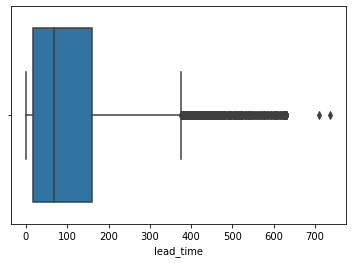

In [25]:
#Outliers
sns.boxplot(x=data['lead_time'])

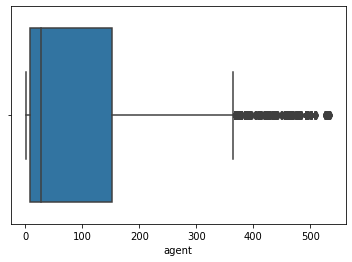

In [26]:
sns.boxplot(x=data['agent'])

In [27]:
#Outlier treatment
Q1 = data['lead_time'].quantile(0.25)
Q3 = data['lead_time'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['lead_time'] >= Q1 - 1.5*IQR) & (data['lead_time'] <= Q3 + 1.5*IQR)]

Q1 = data['agent'].quantile(0.25)
Q3 = data['agent'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['agent'] >= Q1 - 1.5*IQR) & (data['agent'] <= Q3 + 1.5*IQR)]

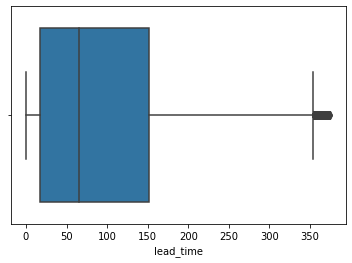

In [28]:
sns.boxplot(x=data['lead_time'])

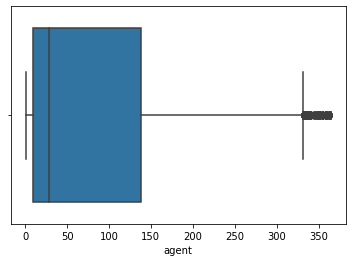

In [29]:
sns.boxplot(x=data['agent'])

In [30]:
data.shape

(114621, 29)

In [31]:
cr=data.corr()
cr.is_canceled

hotel                            -0.128425
lead_time                         0.286167
arrival_date_month                0.007377
arrival_date_week_number          0.004529
arrival_date_day_of_month        -0.005040
stays_in_weekend_nights           0.007345
stays_in_week_nights              0.031154
adults                            0.056224
children                          0.008721
babies                           -0.031613
meal                             -0.001581
country                           0.248711
market_segment                    0.071669
distribution_channel              0.167029
is_repeated_guest                -0.084269
previous_cancellations            0.111545
previous_bookings_not_canceled   -0.055404
reserved_room_type               -0.055570
assigned_room_type               -0.169499
booking_changes                  -0.138985
deposit_type                      0.448209
agent                            -0.068982
days_in_waiting_list              0.055644
customer_ty

In [32]:
#Correlation
cr=data.corr(method='pearson')
corr_variables=[]

for i in cr.columns:
    for j in cr.columns:
        if i!=j:
            if cr[i][j]>0.9:
                corr_variables.append([i,j])
          
corr_variables

[['arrival_date_month', 'arrival_date_week_number'],
 ['arrival_date_week_number', 'arrival_date_month']]

In [34]:
data=data.drop(['arrival_date_week_number'],axis=1)

In [35]:
#Correlation
cr=data.corr(method='pearson')
corr_variables=[]

for i in cr.columns:
    for j in cr.columns:
        if i!=j:
            if cr[i][j]>0.9:
                corr_variables.append([i,j])
          
corr_variables

[]

In [36]:
##Preprocesing
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

[5.97873933e-03 2.93730742e-02 2.54303812e-03 1.94536398e-03
 1.97994588e-03 2.14926457e-03 1.83964174e-03 1.14954077e-03
 1.15744372e-04 2.37378147e-03 3.21336841e-02 1.42467519e-02
 1.01154199e-02 2.47268225e-03 7.58108385e-03 3.49404392e-04
 2.55392525e-03 7.23925862e-03 3.00103556e-03 8.03733865e-02
 4.89043838e-03 1.08304011e-03 1.03673286e-02 3.81631173e-03
 8.75601252e-03 1.82458873e-02 7.43326215e-01]


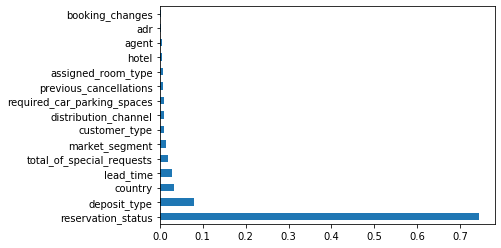

In [37]:
#feature importance
#Feature importance
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()#Feature importance

In [39]:
f_cols=feat_importances.nlargest(10).index.to_list()
f_cols

['reservation_status',
 'deposit_type',
 'country',
 'lead_time',
 'total_of_special_requests',
 'market_segment',
 'customer_type',
 'distribution_channel',
 'required_car_parking_spaces',
 'previous_cancellations']

In [41]:
X1=data[f_cols]
y1=y

In [44]:
X1.describe()

,reservation_status,deposit_type,country,lead_time,total_of_special_requests,market_segment,customer_type,distribution_channel,required_car_parking_spaces,previous_cancellations
count,114621.000000,114621.000000,114621.000000,114621.000000,114621.000000,114621.000000,114621.000000,114621.000000,114621.000000,114621.000000
mean,0.655892,0.113749,92.592876,95.557926,0.583654,4.954886,2.128886,2.582651,0.063767,0.088876
std,0.496539,0.321630,44.672461,92.730674,0.798637,1.273975,0.575188,0.907107,0.247601,0.860612
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,56.000000,17.000000,0.000000,4.000000,2.000000,3.000000,0.000000,0.000000
50%,1.000000,0.000000,81.000000,66.000000,0.000000,5.000000,2.000000,3.000000,0.000000,0.000000
75%,1.000000,0.000000,135.000000,152.000000,1.000000,6.000000,2.000000,3.000000,0.000000,0.000000
max,2.000000,2.000000,176.000000,375.000000,5.000000,6.000000,3.000000,4.000000,8.000000,26.000000


In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.3,random_state=1)

In [55]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve


RFC=RandomForestClassifier(n_estimators=100, bootstrap=True, criterion='gini')

RFC.fit(X_train,y_train)

y_pred=RFC.predict(X_test)

print('Confusion matrix:  \n', confusion_matrix(y_test,y_pred))
print('accuracy_score   :   ', accuracy_score(y_test,y_pred))

Confusion matrix:  
 [[21864     0]
 [    0 12523]]
accuracy_score   :    1.0


In [52]:
y_test.value_counts()

0    21864
1    12523
Name: is_canceled, dtype: int64

In [60]:
#Standardization
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
norm_data = MinMaxScaler().fit_transform(X1)
norm_data=pd.DataFrame(norm_data,columns=X1.columns)

X2=norm_data.iloc[:,:-1]
y2=y

norm_data.head()

,reservation_status,deposit_type,country,lead_time,total_of_special_requests,market_segment,customer_type,distribution_channel,required_car_parking_spaces,previous_cancellations
0,0.5,0.0,0.767045,0.912000,0.0,0.500000,0.666667,0.25,0.0,0.0
1,0.5,0.0,0.335227,0.018667,0.0,0.500000,0.666667,0.25,0.0,0.0
2,0.5,0.0,0.335227,0.034667,0.0,0.333333,0.666667,0.00,0.0,0.0
3,0.5,0.0,0.335227,0.037333,0.2,1.000000,0.666667,0.75,0.0,0.0
4,0.5,0.0,0.335227,0.037333,0.2,1.000000,0.666667,0.75,0.0,0.0


In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X2,y2,test_size=0.3,random_state=1)

In [62]:
#NaiveBayes
from sklearn.naive_bayes import GaussianNB
GNB=GaussianNB()
GNB.fit(X_train,y_train)
y_pred =GNB.predict(X_test)
#Accuracy Score
from sklearn.metrics import accuracy_score
acc_score=accuracy_score(y_test,y_pred)
print('accuracy_score is ',acc_score)


accuracy_score is  0.9985750428941169


# PCA


In [71]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [72]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
norm_data = StandardScaler().fit_transform(X1)
norm_data=pd.DataFrame(norm_data,columns=X1.columns)

X2=norm_data.iloc[:,:-1]
y2=y

In [73]:
from sklearn.decomposition import PCA 
  
# Let's say, components = 2
pca = PCA(n_components = 2) 
pca.fit(X2) 
x_pca = pca.transform(X2) 
  
x_pca.shape

(114621, 2)

In [74]:
#Data Splitting into train and test
X3=x_pca
y3=y

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X3,y3,test_size=0.3, random_state=1)

In [76]:
#NaiveBayes
from sklearn.naive_bayes import GaussianNB
GNB=GaussianNB()
GNB.fit(X_train,y_train)
y_pred =GNB.predict(X_test)
#Accuracy Score
from sklearn.metrics import accuracy_score
acc_score=accuracy_score(y_test,y_pred)
print('Confusion matrix:  \n', confusion_matrix(y_test,y_pred))
print('accuracy_score   :   ', accuracy_score(y_test,y_pred))

Confusion matrix:  
 [[21615   249]
 [ 3768  8755]]
accuracy_score   :    0.8831825980748539


# Gradient Boosting

In [81]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=1)

from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier()
GBC.fit(X_train,y_train)
y_pred = GBC.predict(X_test)
print('Accuracy',accuracy_score(y_test,y_pred))

Accuracy 1.0


# Random Forest with hyper parameter tuning

In [77]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [82]:
grid_param = {
    'n_estimators': [100, 300, 50, 200, 500],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
gd_sr = GridSearchCV(estimator=RFC,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

gd_sr.fit(X_train, y_train)

best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)